In [1]:
import numpy as np
data = [np.loadtxt("data/data{}.csv".format(i+1), delimiter=",").T for i in range(4)]
data = [d[:, d[0].argsort()] for d in data]
data = [d - np.transpose([d.mean(axis=1)]) for d in data]

In [2]:
def least_square(X, y):
    return np.linalg.inv(X.T @ X) @ (X.T) @ y

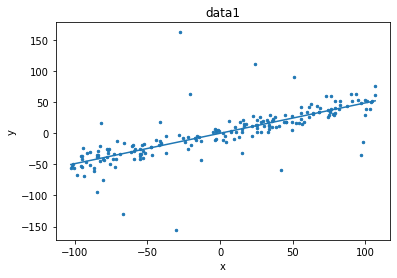

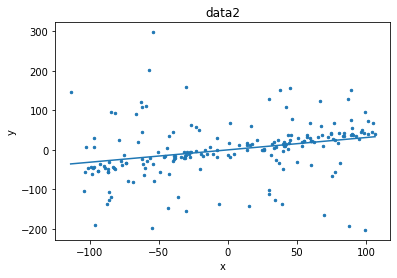

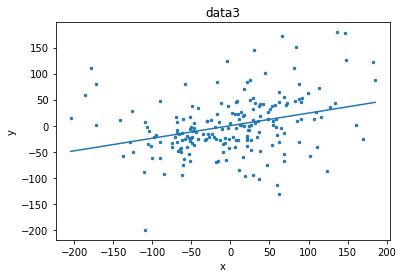

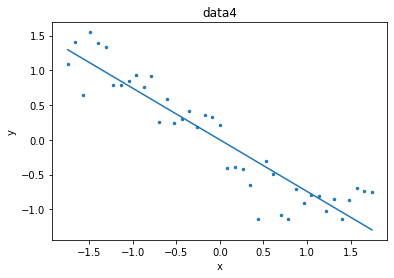

In [3]:
import matplotlib.pyplot as plt
for i in range(4):
    X = np.vander(data[i][0], 2, True)
    y = data[i][1]
    plt.scatter(data[i][0],data[i][1],s=6)
    plt.plot(data[i][0], X @ least_square(X, y))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("data{}".format(i+1))
    plt.show()

In [4]:
def reg(X, y, l):
    return np.linalg.inv(X.T @ X + l * np.identity(len(X.T @ X))) @ (X.T) @ y

-102.7662354542


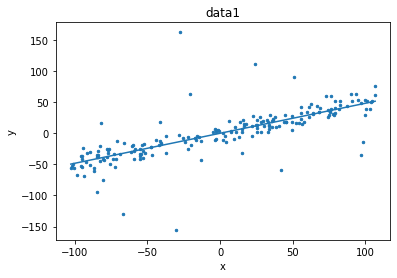

-113.61627219425


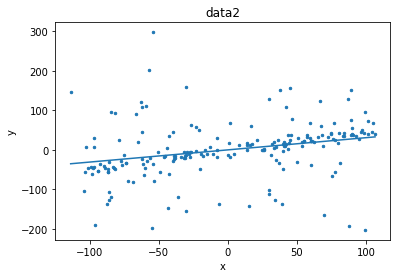

-204.14419066924998


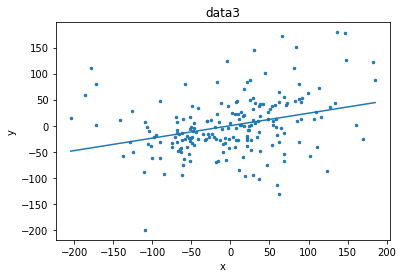

-1.7453292519512196


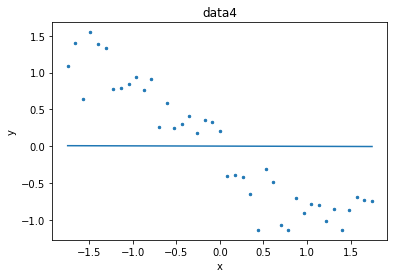

In [5]:
for i in range(4):
    X = np.vander(data[i][0], 2, True)
    y = data[i][1]
    plt.scatter(data[i][0],data[i][1],s=6)
    print(min(data[i][0]))
    plt.plot(data[i][0], X @ reg(X, y, 10000))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("data{}".format(i+1))
    plt.show()

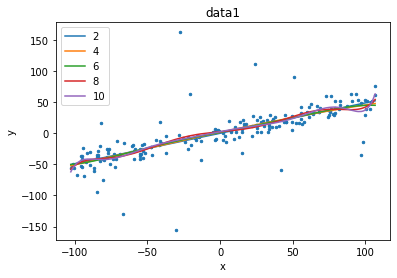

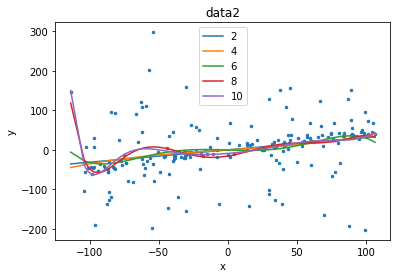

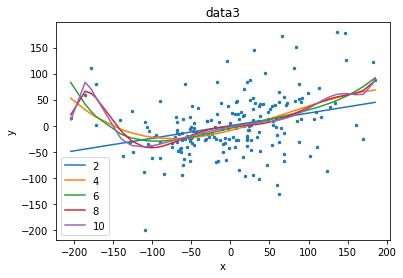

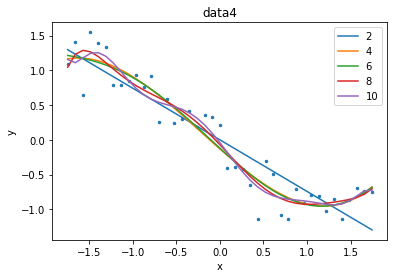

In [6]:
for i in range(4):
    y = data[i][1]
    plt.scatter(data[i][0],data[i][1],s=6)
    for k in range(2, 11, 2):
        X = np.vander(data[i][0], k, True)
        plt.plot(data[i][0], X @ reg(X, y, 0), label=k)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("data{}".format(i+1))
    plt.legend()
    plt.show()

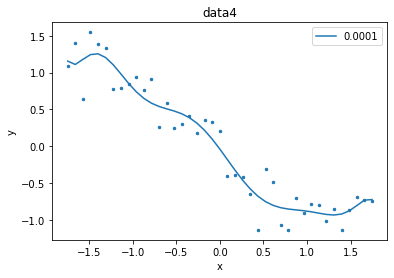

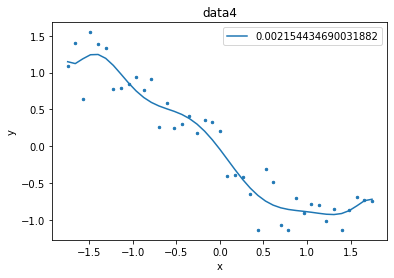

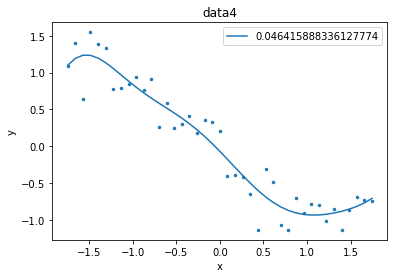

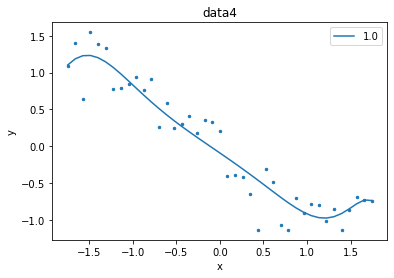

In [7]:
for l in np.logspace(-4, 0, 4):
    X = np.vander(data[3][0], 10, True)
    y = data[3][1]
    plt.scatter(data[3][0],y,s=6)
    plt.plot(data[3][0], X @ reg(X, y, l), label=l)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("data4")
    plt.legend()
    plt.show()